# **Second Hand Car Price Prediction**

In [59]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError

In [60]:
# importing data
data = pd.read_csv('train.csv')
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [61]:
# checking shape of data
data.shape

(1000, 12)

In [62]:
# checking columns
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

c:\Users\masan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


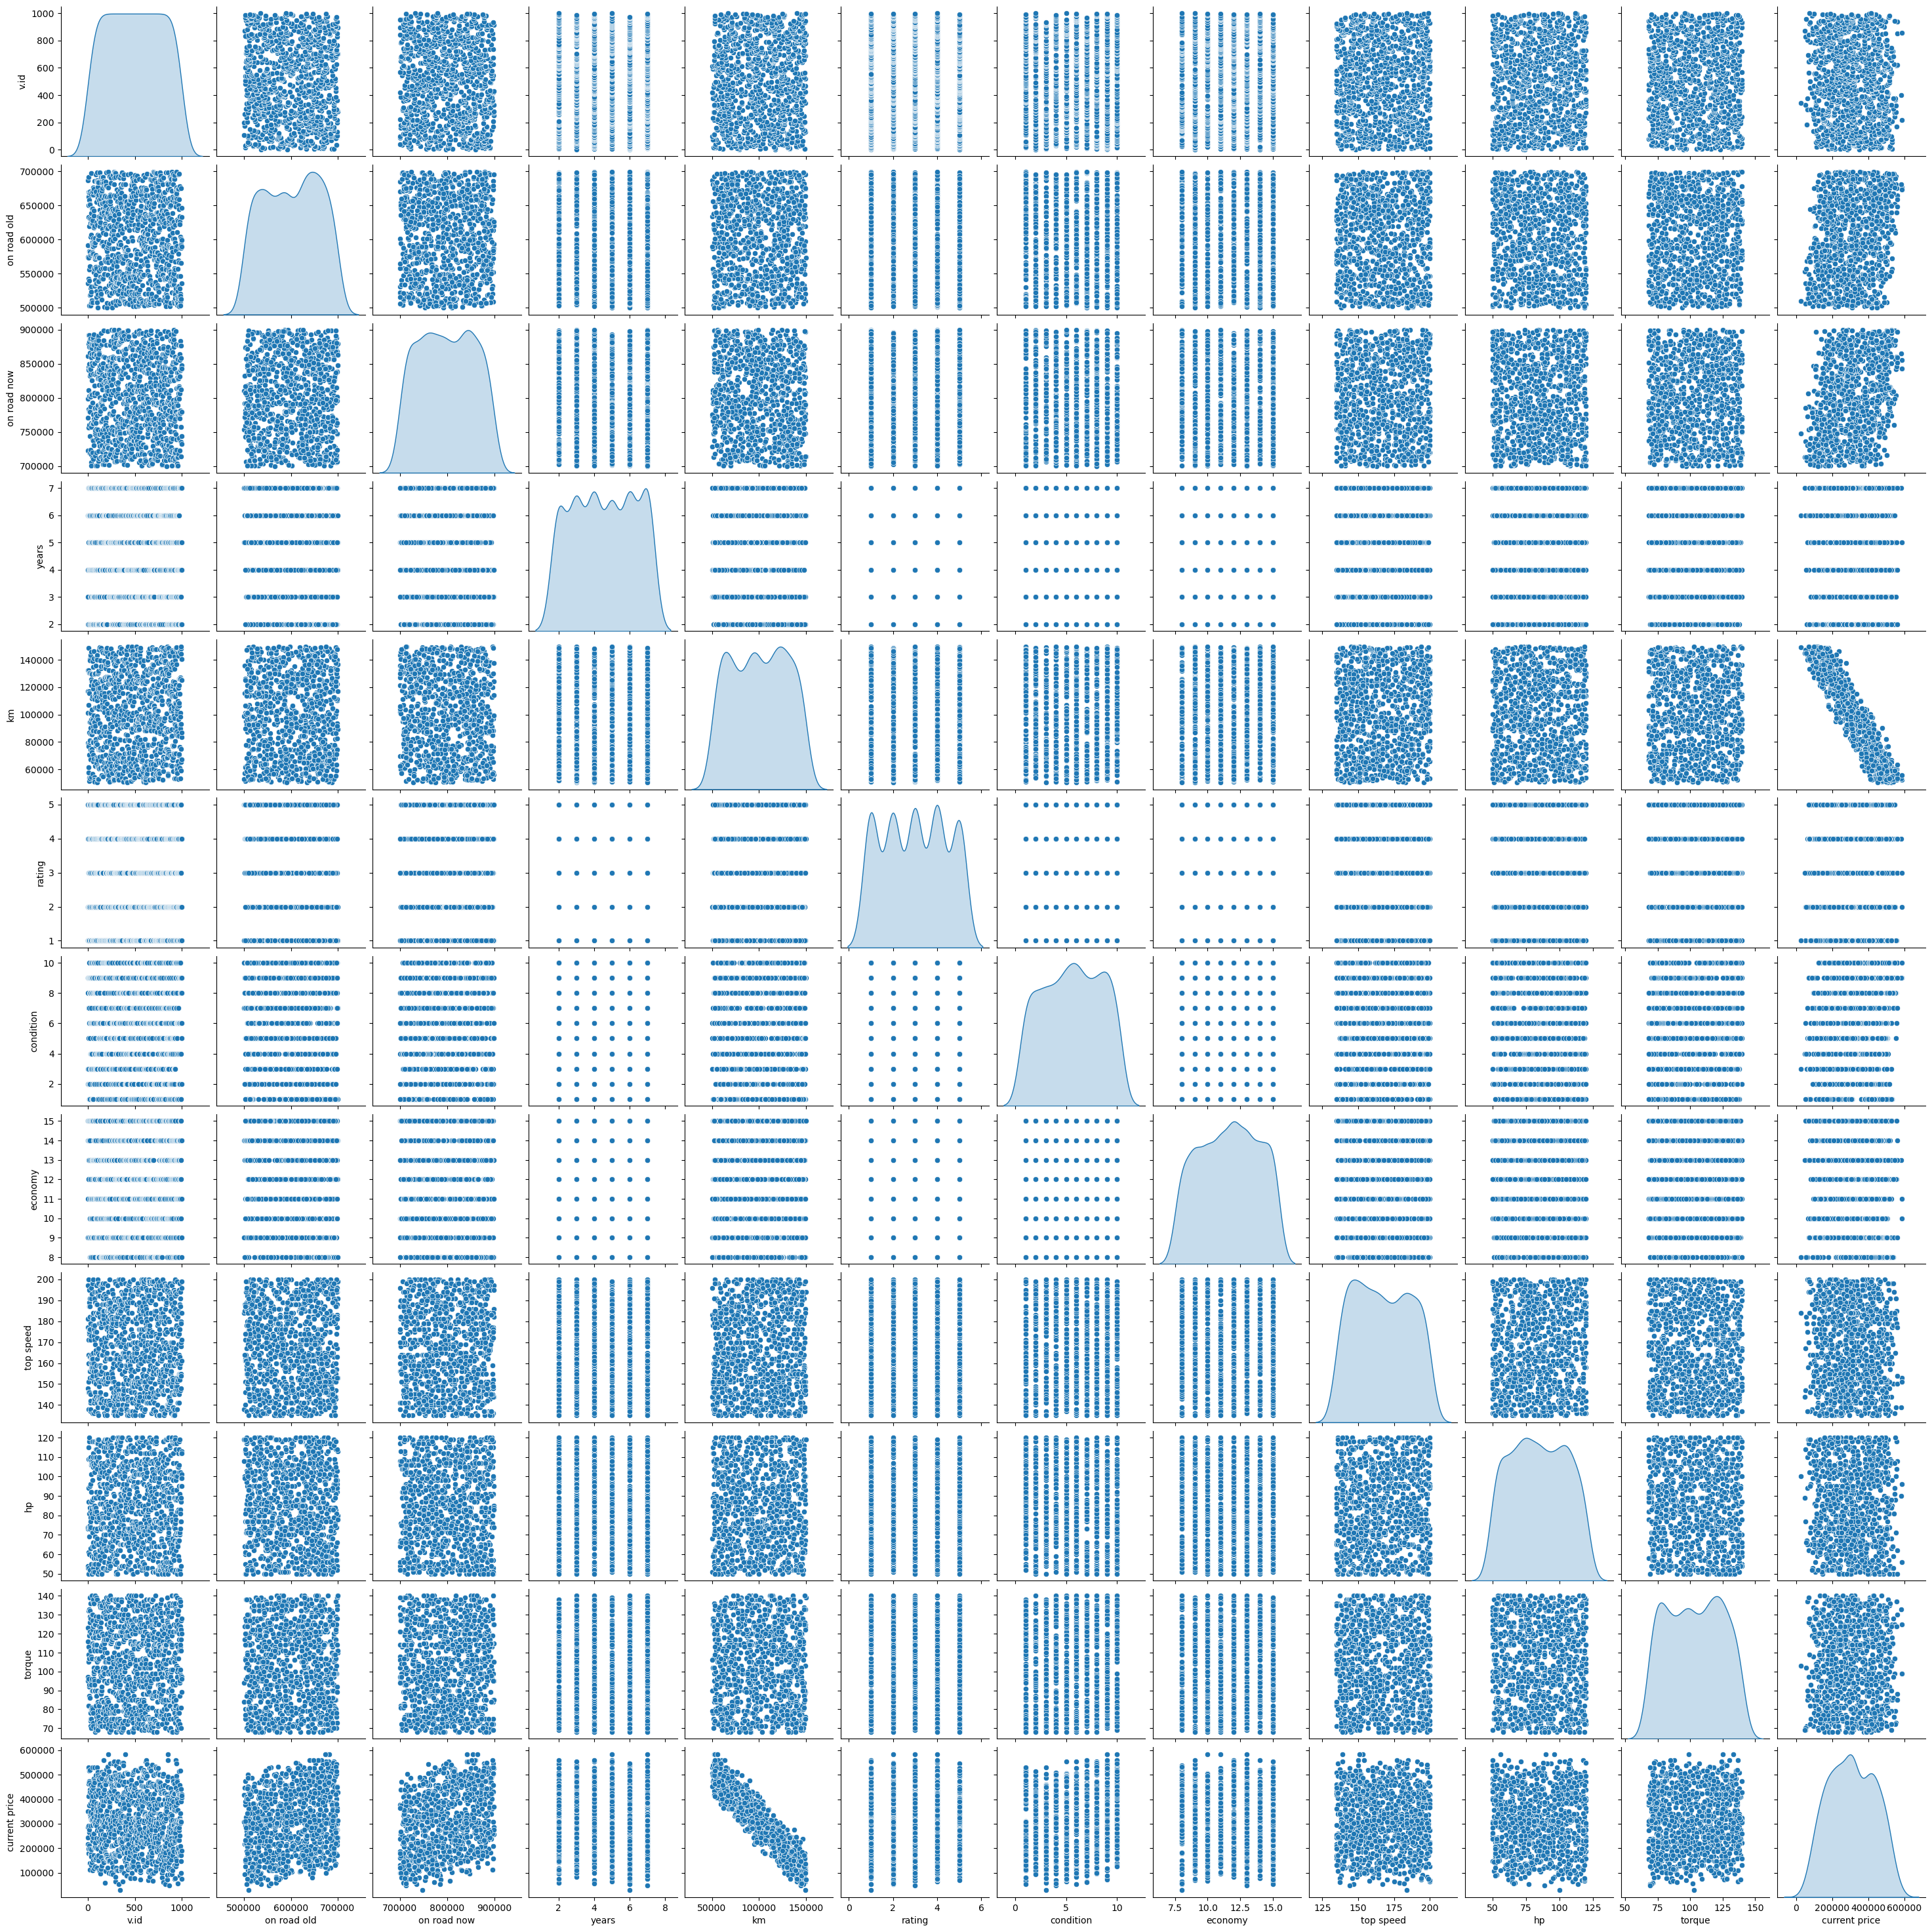

In [21]:
# plotting every column with every column
sns.pairplot(data[['v.id', 'on road old', 'on road now', 'years', 'km', 'rating'
,'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [63]:
# creating a tensor of data
tensor_data = tf.constant(data, dtype=tf.float32)
print(tensor_data.shape)
tensor_data[:5, :]

(1000, 12)


<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, 3.000000e+00,
        7.894500e+04, 1.000000e+00, 2.000000e+00, 1.400000e+01,
        1.770000e+02, 7.300000e+01, 1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, 6.000000e+00,
        1.172200e+05, 5.000000e+00, 9.000000e+00, 9.000000e+00,
        1.480000e+02, 7.400000e+01, 9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, 2.000000e+00,
        1.325380e+05, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.810000e+02, 5.300000e+01, 9.700000e+01, 2.153860e+05],
       [4.000000e+00, 5.739990e+05, 7.223810e+05, 4.000000e+00,
        1.010650e+05, 4.000000e+00, 3.000000e+00, 1.100000e+01,
        1.970000e+02, 5.400000e+01, 1.160000e+02, 2.442955e+05],
       [5.000000e+00, 6.913880e+05, 8.113350e+05, 6.000000e+00,
        6.155900e+04, 3.000000e+00, 9.000000e+00, 1.200000e+01,
        1.600000e+02, 5.300000e+01, 1.050000e+02, 5

In [64]:
# shuffling data
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5, :]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[8.950000e+02, 6.712710e+05, 8.852640e+05, 2.000000e+00,
        1.152410e+05, 4.000000e+00, 8.000000e+00, 1.500000e+01,
        1.970000e+02, 1.010000e+02, 1.140000e+02, 3.345020e+05],
       [6.100000e+02, 6.918810e+05, 8.818620e+05, 5.000000e+00,
        9.083900e+04, 3.000000e+00, 3.000000e+00, 1.100000e+01,
        1.680000e+02, 8.300000e+01, 7.000000e+01, 4.224170e+05],
       [4.740000e+02, 6.474220e+05, 7.507740e+05, 2.000000e+00,
        1.322150e+05, 3.000000e+00, 7.000000e+00, 1.200000e+01,
        1.370000e+02, 1.000000e+02, 1.080000e+02, 1.789915e+05],
       [7.610000e+02, 5.115500e+05, 7.505050e+05, 5.000000e+00,
        1.308100e+05, 2.000000e+00, 1.000000e+01, 1.500000e+01,
        1.760000e+02, 5.400000e+01, 8.900000e+01, 1.565130e+05],
       [7.090000e+02, 6.623180e+05, 7.104170e+05, 4.000000e+00,
        8.220400e+04, 4.000000e+00, 2.000000e+00, 1.400000e+01,
        1.410000e+02, 1.010000e+02, 7.300000e+01, 3

In [65]:
# creating input variable x
X = tensor_data[:, 3:-1]
print(X.shape)
X[:5, :]

(1000, 8)


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[2.00000e+00, 1.15241e+05, 4.00000e+00, 8.00000e+00, 1.50000e+01,
        1.97000e+02, 1.01000e+02, 1.14000e+02],
       [5.00000e+00, 9.08390e+04, 3.00000e+00, 3.00000e+00, 1.10000e+01,
        1.68000e+02, 8.30000e+01, 7.00000e+01],
       [2.00000e+00, 1.32215e+05, 3.00000e+00, 7.00000e+00, 1.20000e+01,
        1.37000e+02, 1.00000e+02, 1.08000e+02],
       [5.00000e+00, 1.30810e+05, 2.00000e+00, 1.00000e+01, 1.50000e+01,
        1.76000e+02, 5.40000e+01, 8.90000e+01],
       [4.00000e+00, 8.22040e+04, 4.00000e+00, 2.00000e+00, 1.40000e+01,
        1.41000e+02, 1.01000e+02, 7.30000e+01]], dtype=float32)>

In [66]:
# creating output variable y
y = tensor_data[:, -1]
print(y[:5])
# it has shape of one dimensional tensor
# but since we have two dimensional tensor as input, we will have to expand the
# shape of out tensor to two dimension
print(y.shape)
y = tf.expand_dims(y, axis=-1)
print(y.shape)
y[:5, :]

tf.Tensor([334502.  422417.  178991.5 156513.  357823. ], shape=(5,), dtype=float32)
(1000,)
(1000, 1)


<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[334502. ],
       [422417. ],
       [178991.5],
       [156513. ],
       [357823. ]], dtype=float32)>

In [67]:
train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1
data_size = len(data)
print(data_size)

1000


In [73]:
X_train = X[:int(data_size*train_ratio), :]
y_train = y[:int(data_size*train_ratio), :]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [74]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [75]:
# for x,y in train_dataset:
#     print(x.shape)

In [76]:
X_val = X[int(data_size*train_ratio):int(data_size*(train_ratio +  val_ratio)), :]
y_val = y[int(data_size*train_ratio):int(data_size*(train_ratio + val_ratio)), :]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [77]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [78]:
X_test = X[int(data_size*(train_ratio +  val_ratio)):int(data_size*(train_ratio +  val_ratio + test_ratio))+1, :]
y_test = y[int(data_size*(train_ratio +  val_ratio)):int(data_size*(train_ratio +  val_ratio + test_ratio))+1, :]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [79]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [80]:
# normalizing data
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5, :]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.4904962 ,  0.513682  ,  0.72177976,  0.8529826 ,  1.5138371 ,
         1.5616695 ,  0.802373  ,  0.50251454],
       [ 0.2554971 , -0.323842  ,  0.00855871, -0.9181603 , -0.28034022,
         0.0574213 , -0.07538997, -1.5879271 ],
       [-1.4904962 ,  1.0962626 ,  0.00855871,  0.498754  ,  0.16820413,
        -1.5505681 ,  0.75360835,  0.21745433],
       [ 0.2554971 ,  1.0480403 , -0.7046623 ,  1.5614398 ,  1.5138371 ,
         0.4723863 , -1.4895636 , -0.6852364 ],
       [-0.32650068, -0.6202119 ,  0.72177976, -1.2723888 ,  1.0652928 ,
        -1.3430856 ,  0.802373  , -1.445397  ]], dtype=float32)>

In [107]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(8,)))
model.add(normalizer)
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_13 (Dense)            (None, 128)               1152      
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                      

In [108]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [109]:
model.compile(optimizer = Adam(learning_rate=0.1), loss = MeanAbsoluteError(), metrics=MeanSquaredError())

In [110]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=1000, verbose=1)

Epoch 1/1000


25/25 [==============================] - 2s 18ms/step - loss: 128330.1016 - mean_squared_error: 29585977344.0000 - val_loss: 70200.7109 - val_mean_squared_error: 7862736896.0000
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 56769.3750 - mean_squared_error: 4998212096.0000 - val_loss: 43214.4336 - val_mean_squared_error: 2883062272.0000
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 45030.0000 - mean_squared_error: 3047767808.0000 - val_loss: 42399.8516 - val_mean_squared_error: 2772332800.0000
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 42978.0938 - mean_squared_error: 2827909120.0000 - val_loss: 44866.0234 - val_mean_squared_error: 3092987136.0000
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 47409.1836 - mean_squared_error: 3431303168.0000 - val_loss: 41393.5078 - val_mean_squared_error: 2609591808.0000
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - lo

In [111]:
history.history

{'loss': [128330.1015625,
  56769.375,
  45030.0,
  42978.09375,
  47409.18359375,
  46539.3203125,
  50543.51953125,
  48068.609375,
  43180.10546875,
  46324.0,
  44170.921875,
  46473.609375,
  41480.08203125,
  41133.0859375,
  45261.0,
  38648.99609375,
  39708.59375,
  38642.39453125,
  40413.05859375,
  39311.20703125,
  38609.8046875,
  49273.734375,
  50224.6015625,
  39555.1953125,
  41829.87109375,
  38180.41015625,
  38438.15234375,
  39131.1015625,
  37503.3984375,
  38899.87890625,
  38718.80078125,
  37870.8359375,
  36930.49609375,
  41347.4609375,
  46660.55078125,
  42315.81640625,
  46048.23828125,
  38035.05859375,
  40655.6640625,
  46045.296875,
  38346.4921875,
  38929.32421875,
  39889.04296875,
  36835.0546875,
  37084.890625,
  36886.328125,
  36499.515625,
  36799.26171875,
  36892.19140625,
  39428.1015625,
  41215.2109375,
  37291.55859375,
  36961.66015625,
  35860.7109375,
  37265.21875,
  34047.71875,
  37570.37890625,
  35041.421875,
  34470.09375,
  36

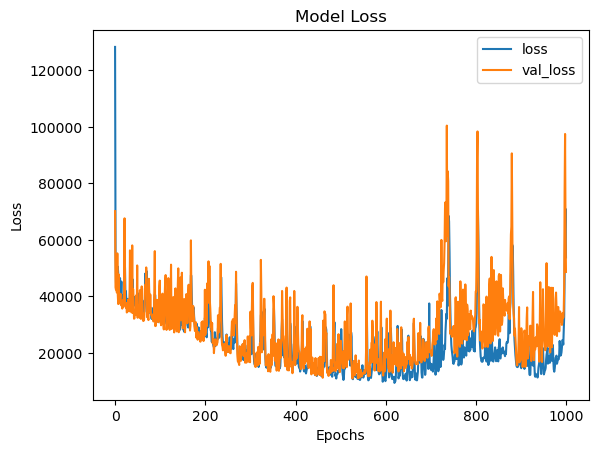

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['loss', 'val_loss'])
plt.show()

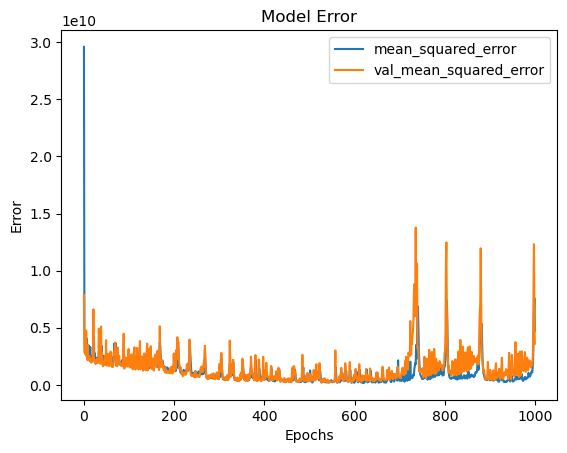

In [113]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title("Model Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['mean_squared_error', 'val_mean_squared_error'])
plt.show()

In [114]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 52891.8516 - mean_squared_error: 4377892864.0000


[52891.8515625, 4377892864.0]

In [115]:
y_pred = list(model.predict(X_test)[:,0])

4/4 [==============================] - 0s 3ms/step


In [116]:
y_true = list(y_test[:,0].numpy())

In [117]:
X_test[0].shape

TensorShape([8])

In [118]:
model.predict(X_test[0])

1/1 [==============================] - 0s 144ms/step


array([[527518.]], dtype=float32)

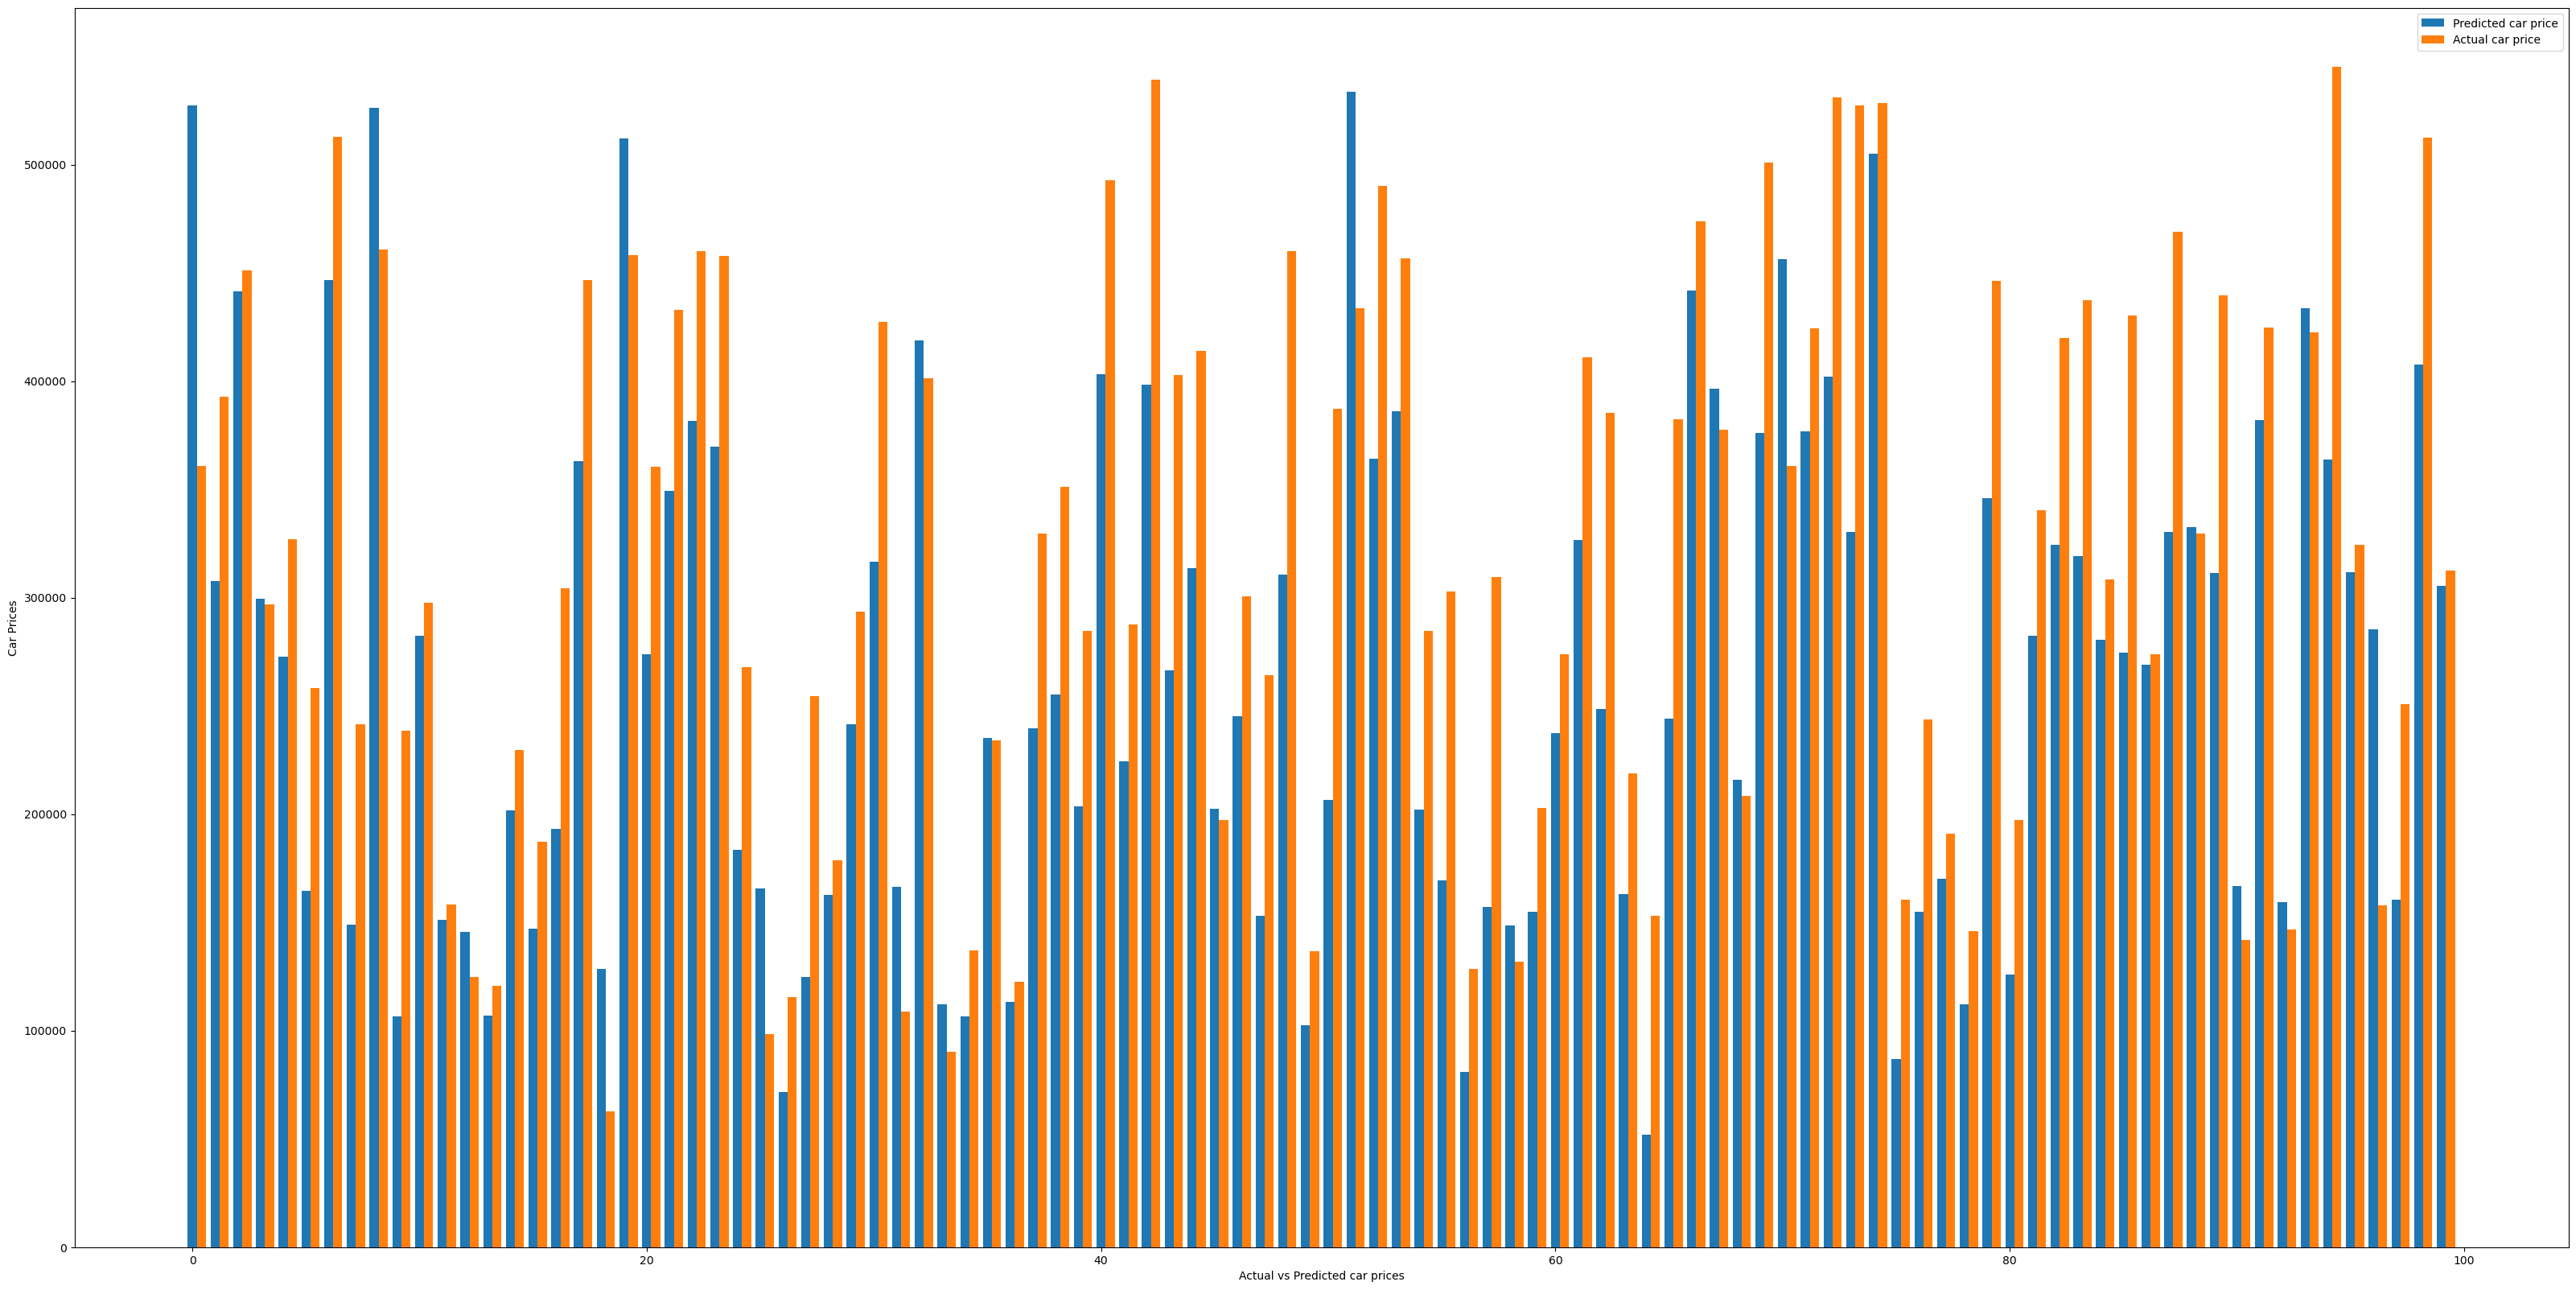

In [119]:
ind = np.arange(100)
plt.figure(figsize=(40, 20))

width = 0.4

plt.bar(ind, y_pred, width, label='Predicted car price')
plt.bar(ind + width, y_true, width, label='Actual car price')

plt.xlabel("Actual vs Predicted car prices")
plt.ylabel("Car Prices")

plt.legend(['Predicted car price', 'Actual car price'])

plt.show()